In [1]:
from turb.lesgo_utils import lesgo_data
import numpy as np
import turb.lesgo_utils
import matplotlib.pyplot as plt
import pyutils.plot_utils as pltutils

# Forward Simulation

# Generate IC files in input directory

In [2]:
root_dir = '/home/zyou6474/tasks/demo_foward'
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]
t_total = 5000
nk = 2
tt = np.arange(0, t_total + 1, 100)

ldata = lesgo_data(domain, dims, root_dir, ntheta=3)

In [3]:
# ldata.gaussian_field(fieldname = 'theta.IC', nk=1, source_point = [np.pi*5/3, np.pi/2, 1/2], gen_fig=False, variance=1e-2)
# ldata.gaussian_field(fieldname = 'theta.IC', nk=2, source_point = [np.pi*5/3, np.pi/2, 1/3], gen_fig=False, variance=1e-2)
# ldata.gaussian_field(fieldname = 'theta.IC', nk=3, source_point = [np.pi*5/3, np.pi/2, 2/3], gen_fig=True, variance=1e-2)

Change the output format through lesgo_data._fnames

write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.001
write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.002
write data into /home/zyou6474/tasks/demo_foward/inputs/theta.IC.003
write data into /home/zyou6474/tasks/demo_foward/inputs/source.001
write data into /home/zyou6474/tasks/demo_foward/inputs/source.002
write data into /home/zyou6474/tasks/demo_foward/inputs/source.003


((<Figure size 800x400 with 4 Axes>,
  [<Axes: xlabel='x', ylabel='y'>,
   <Axes: xlabel='x', ylabel='z'>,
   <Axes: xlabel='y', ylabel='z'>]),
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

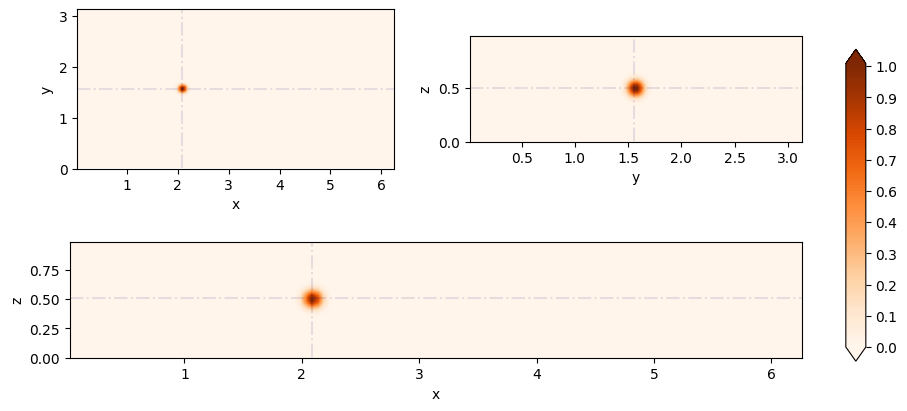

In [4]:
ldata._fnames(fmt_ntheta='%.3i')
ldata.constant_field(fieldname = 'theta.IC', nk=1, gen_fig=False)
ldata.constant_field(fieldname = 'theta.IC', nk=2, gen_fig=False)
ldata.constant_field(fieldname = 'theta.IC', nk=3, gen_fig=True)
ldata.gaussian_field(fieldname = 'source', nk=1, source_point = [np.pi*1/3, np.pi/2, 1/2], gen_fig=False, variance=5e-2)
ldata.gaussian_field(fieldname = 'source', nk=2, source_point = [np.pi*1/2, np.pi/2, 1/2], gen_fig=False, variance=5e-2)
ldata.gaussian_field(fieldname = 'source', nk=3, source_point = [np.pi*2/3, np.pi/2, 1/2], gen_fig=True, variance=5e-2)

## Read data from forward simulation

In [5]:
ldata.read_data(t_ind=1)
ldata.data['theta'].shape

(3, 128, 128, 64)

## Read data at given sensor locations from simulation results

In [6]:
from matplotlib import cm, colors
# Sensor Location
sx = (5/3*np.pi, 5/3*np.pi, 5/3*np.pi)
sy = (1/2*np.pi, 1/2*np.pi, 1/2*np.pi)
sz = (1/2, 1/3, 2/3)

sensor_locs = (sx, sy, sz)

In [7]:
ldata.sensor_measurements(sensor_locs, tt, vmin=1e-3, vmax=1e-1, norm=colors.AsinhNorm, gen_gif=True, nk = nk)

gif written in ./result_002_2023_07_10.gif


# Backward Simulation

In [8]:
adjoint_dir = '/home/zyou6474/tasks/demo_adjoint'
ldata.set_adjoint(adjoint=True, adjoint_dir=adjoint_dir)
ldata._fnames(fmt_ntheta='%.3i')

ldata.sensor_init_(sensor_locs)

ldata.sensor_field()
ldata.sensor_field(field_func = ldata.constant_field, fieldname='theta.IC')

write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.003
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/source.003
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.003
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.001
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.002
write data into /home/zyou6474/tasks/demo_adjoint/inputs/theta.IC.003


[array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [9]:
ldata.adjoint_intersect(adjoint_tend = 2100, gif_fname='adjoint_intersect', vmin = 0, vmax = 5e-2)

/home/zyou6474/.venv/lib/python3.10/site-packages/python_utils-0.1.0-py3.10.egg/turb/lesgo_utils.py:539: RuntimeWarning: invalid value encountered in divide


gif written in adjoint_intersect_002_2023_07_10.gif


In [41]:
ldata.read_sensor_adjoint(t_ind=1000)

In [56]:
def normal(data):
    vmin = data.min()
    vmax = data.max()
    data =  (data - vmin) /  (vmax - vmin)
    return data

In [62]:
ldata.data['adjoint'].max()

0.01901221146837118

In [66]:
ldata.data['adjoint'].min()

-0.006728332766272865

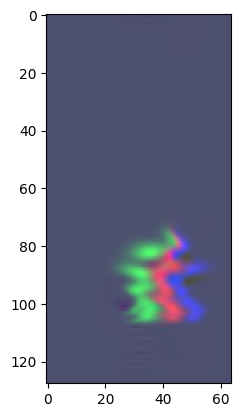

In [61]:
z = np.zeros(shape=(128, 64, 4))
z[:, :, 0] = normal(ldata.data['adjoint'][0, 0, :, 64, :])
z[:, :, 1] = normal(ldata.data['adjoint'][0, 1, :, 64, :])
# z[:, :, 2] = normal(ldata.data['adjoint'][0, 2, :, 64, :])
z[:, :, 2] = normal(ldata.data['adjoint'][0, 2, :, 64, :])
z[:, :, 3] = 0.8

plt.imshow(z,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


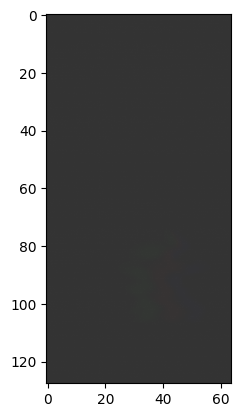

In [65]:
z = np.zeros(shape=(128, 64, 4))
z[:, :, 0] = ldata.data['adjoint'][0, 0, :, 64, :]
z[:, :, 1] = ldata.data['adjoint'][0, 1, :, 64, :]
z[:, :, 2] = ldata.data['adjoint'][0, 2, :, 64, :]
z[:, :, 3] = 0.8

plt.imshow(z, norm=colors.Normalize(vmin =0, vmax = 1e-2, clip=True))